In [60]:
import pandas as pd
import requests
from io import StringIO
import numpy as np
import seaborn as sns

In [32]:

req = requests.get('https://github.com/thisisjasonjafari/my-datascientise-handcode/raw/master/005-datavisualization/titanic.csv')
data = StringIO(req.text)

In [33]:
df = pd.read_csv(data)

# 1.How big is Data

In [34]:
df.shape

(1309, 14)

# 2.How does the Data look like?


In [35]:
df.sample(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
212,1,0,"Natsch, Mr. Charles H",male,37.0,0,1,PC 17596,29.7000,C118,C,NaN,NaN,"Brooklyn, NY"
876,3,0,"Ilieff, Mr. Ylio",male,NaN,0,0,349220,7.8958,NaN,S,NaN,NaN,NaN
706,3,0,"Caram, Mrs. Joseph (Maria Elias)",female,NaN,1,0,2689,14.4583,NaN,C,NaN,NaN,"Ottawa, ON"
1082,3,1,"Olsen, Master. Artur Karl",male,9.0,0,1,C 17368,3.1708,NaN,S,13,NaN,NaN
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN


# 3.What is the Data type of Columns?

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


# 4.Are ther any Missing Values

In [49]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

# 5.How does the data look Mathematically

In [50]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


# 6.Are there Duplicate Values?

In [52]:
df.duplicated().sum()

np.int64(0)

# 7.How is the Corelation between the Columns?

In [57]:
df.corr(numeric_only=True)['survived']

pclass     -0.312469
survived    1.000000
age        -0.055512
sibsp      -0.027825
parch       0.082660
fare        0.244265
body             NaN
Name: survived, dtype: float64

# EDA using Univariate Analysis

## 1. Categorical Data

### a. Countplot

In [58]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


<Axes: xlabel='survived', ylabel='count'>

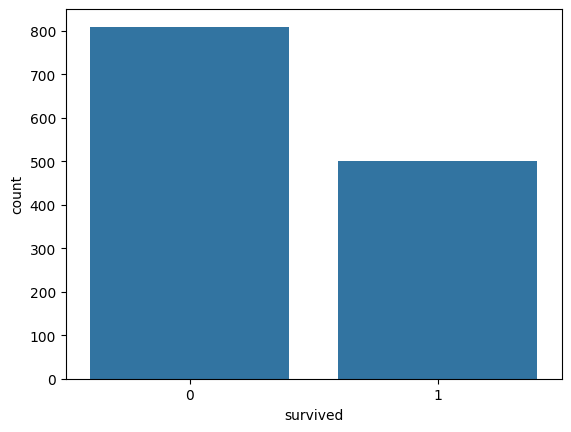

In [72]:
# df['survived'].value_counts().plot(kind='bar')
sns.countplot(x='survived', data=df)

<Axes: xlabel='count', ylabel='sex'>

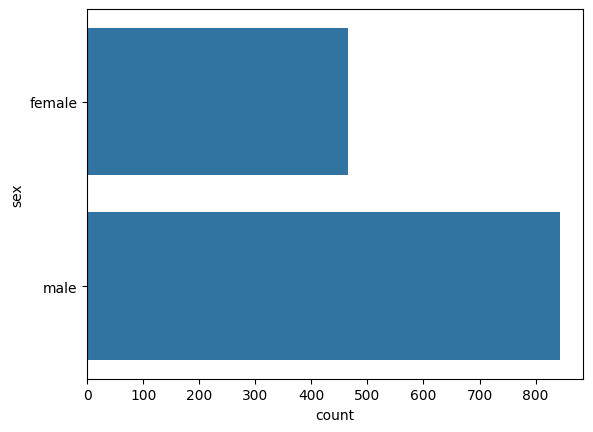

In [67]:
sns.countplot(df['sex'])

<Axes: xlabel='pclass', ylabel='count'>

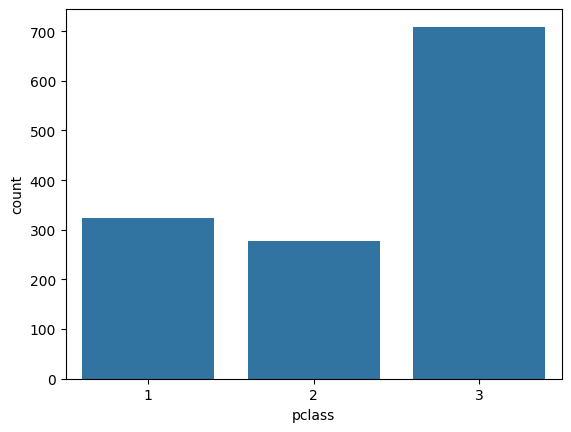

In [83]:
sns.countplot(x='pclass', data=df)


sibsp
0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: count, dtype: int64

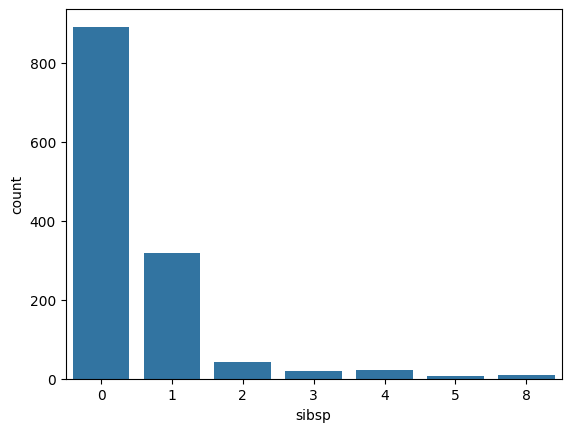

In [75]:
sns.countplot(x='sibsp', data=df)
df['sibsp'].value_counts()

parch
0    1002
1     170
2     113
3       8
4       6
5       6
6       2
9       2
Name: count, dtype: int64

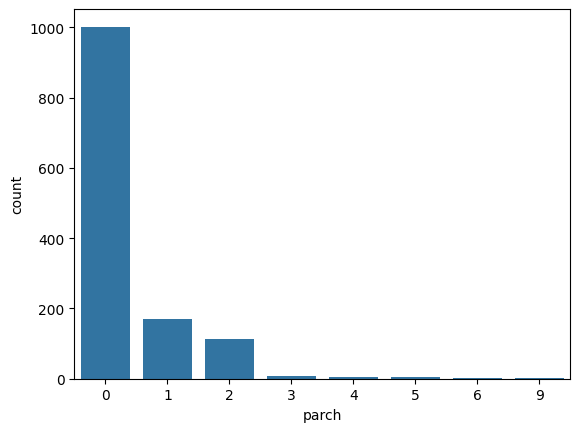

In [76]:
sns.countplot(x='parch', data=df)
df['parch'].value_counts()

embarked
S    914
C    270
Q    123
Name: count, dtype: int64

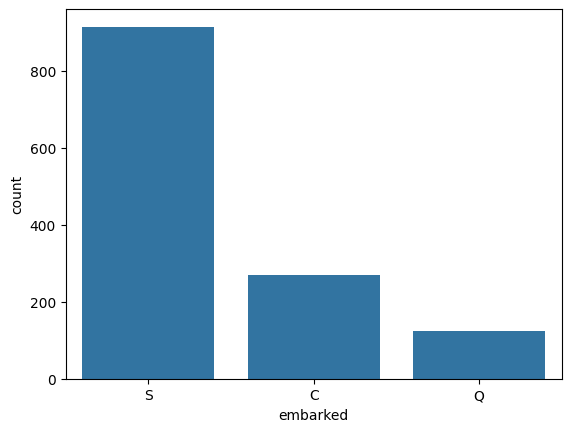

In [84]:
sns.countplot(x='embarked', data=df)
df['embarked'].value_counts()

### b. Piechart

<Axes: ylabel='count'>

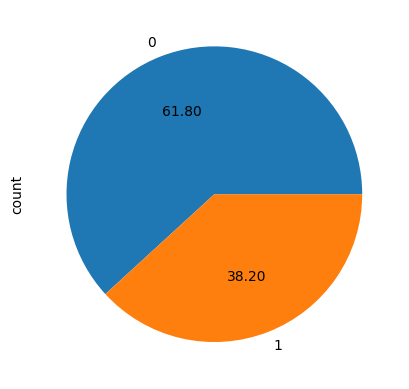

In [86]:
df['survived'].value_counts().plot(kind='pie', autopct='%0.2f')


<Axes: ylabel='count'>

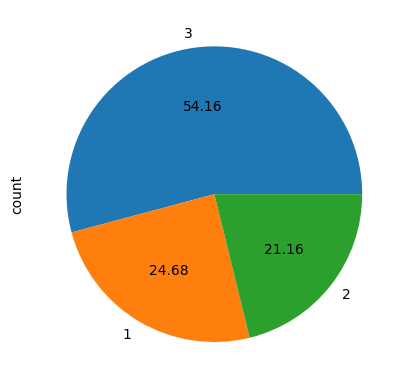

In [88]:
df['pclass'].value_counts().plot(kind='pie', autopct='%.2f')